<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r0_i3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r0/4-fft-normal-n-0-6-9-15-r0.csv?token=AKVFSOAVVUF5FYNV65BEVQS64H3U2')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r0/4-fft-malicious-n-0-6-9-15-m-1-11-r0.csv?token=AKVFSOCTDETCMY2KZPAIPSC64H3VG')


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,63,1,63,63,0,4,3,27,1
1,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,62,1,62,62,0,4,3,27,0
2,132,0,1,4,1,1,5,17,23,7,0,0,1,4,4,1.000000,20,62,2,63,124,0,4,20,340,1
3,133,0,1,4,2,2,5,17,23,7,0,0,1,4,4,1.000000,21,61,3,63,183,0,16,20,340,1
4,134,0,1,4,3,2,5,17,23,7,0,0,1,4,4,1.000000,22,60,4,63,240,0,24,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248091,3278897,1,2,6,2,2,3,9,18,2,20,4,60215,3,2,0.666667,19,5,8,12,40,2,1445160,18,162,0
248092,3278904,1,2,6,3,2,3,9,18,2,20,4,60215,3,2,0.666667,26,4,9,12,36,2,2167740,18,162,0
248093,3278911,1,2,6,4,2,3,9,18,2,20,4,60215,3,2,0.666667,33,3,10,12,30,2,2890320,18,162,0
248094,3278918,1,2,6,5,3,3,9,18,2,20,4,60215,3,2,0.666667,40,2,11,12,22,2,5419350,18,162,0


In [6]:
df.shape

(248096, 26)

Test Data

In [0]:
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r0/4-fft-malicious-n-0-6-9-15-m-1-12-r0.csv?token=AKVFSODNRUSG6XK2HQVZRVS64H5FK')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r0/4-fft-malicious-n-0-6-9-15-m-1-7-r0.csv?token=AKVFSOC2SKUIGTKKWRM2JIC64H3ZA')
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r0/4-fft-malicious-n-0-6-9-15-m-11-12-r0.csv?token=AKVFSOCLRNR2324NBTEBAES64H3ZG')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r0/4-fft-malicious-n-0-6-9-15-m-7-11-r0.csv?token=AKVFSOEPMNCCTKPNX4MNWYS64H3ZM')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r0/4-fft-malicious-n-0-6-9-15-m-7-12-r0.csv?token=AKVFSODEXN6OEHVKJDJWR3S64H3ZS')

In [8]:
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(140312, 26)
(139047, 26)
(135150, 26)
(133707, 26)
(135139, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.325159,0.058119,-0.005428,0.008388,-0.620809,-0.535608,0.002419,0.121781,-0.616792,-0.824576,0.006139,-0.014338,-0.024757,-0.030630,-0.027695,0.142733,0.036371,-0.367466,-0.572635,-0.002964
inport,-0.325159,1.000000,0.188102,0.003584,-0.005538,-0.020020,-0.143214,-0.042318,0.126054,0.482264,0.619522,0.299183,-0.062302,-0.033677,-0.075196,-0.045392,0.843853,0.026150,0.162120,0.007858,-0.087064
cache_coherence_type,0.058119,0.188102,1.000000,0.277061,-0.428176,-0.263323,-0.326649,0.007896,-0.002325,0.017969,-0.023525,-0.232905,0.002150,-0.030201,-0.021977,-0.007381,0.238230,0.284460,0.755288,0.197587,-0.019102
flit_id,-0.005428,0.003584,0.277061,1.000000,0.026688,0.131163,0.097002,0.004508,0.006286,0.015640,0.010030,0.400481,-0.018813,0.009630,-0.007195,-0.007053,0.015852,0.647671,0.347933,0.258514,0.003050
flit_type,0.008388,-0.005538,-0.428176,0.026688,1.000000,-0.202702,-0.149910,-0.006967,-0.009714,-0.024171,-0.015501,0.509579,-0.025867,0.040841,0.011732,0.012503,-0.024498,0.144161,-0.537703,-0.399514,-0.004713
vnet,-0.620809,-0.020020,-0.263323,0.131163,-0.202702,1.000000,0.959427,-0.009710,-0.013115,0.377296,0.580547,-0.220633,-0.014074,0.025268,0.008770,-0.016004,-0.378498,-0.058309,0.433379,0.883169,0.062829
vc,-0.535608,-0.143214,-0.326649,0.097002,-0.149910,0.959427,1.000000,-0.010710,-0.046715,0.273441,0.454336,-0.224603,-0.004727,0.037648,0.025792,-0.002795,-0.460355,-0.081334,0.346657,0.850510,0.062936
traversal_id,0.002419,-0.042318,0.007896,0.004508,-0.006967,-0.009710,-0.010710,1.000000,0.033809,-0.006226,-0.029316,0.006521,0.140146,0.141120,0.220364,0.156796,-0.041273,0.552697,0.000780,-0.007253,-0.306750
hop_count,0.121781,0.126054,-0.002325,0.006286,-0.009714,-0.013115,-0.046715,0.033809,1.000000,0.579064,0.170272,0.330293,-0.003404,-0.037161,-0.031782,-0.043578,0.101884,0.014797,-0.011081,-0.035974,0.004456
current_hop,-0.616792,0.482264,0.017969,0.015640,-0.024171,0.377296,0.273441,-0.006226,0.579064,1.000000,0.787920,0.356729,0.004741,-0.023116,-0.014396,-0.016431,0.146825,-0.010405,0.273110,0.344147,-0.001934


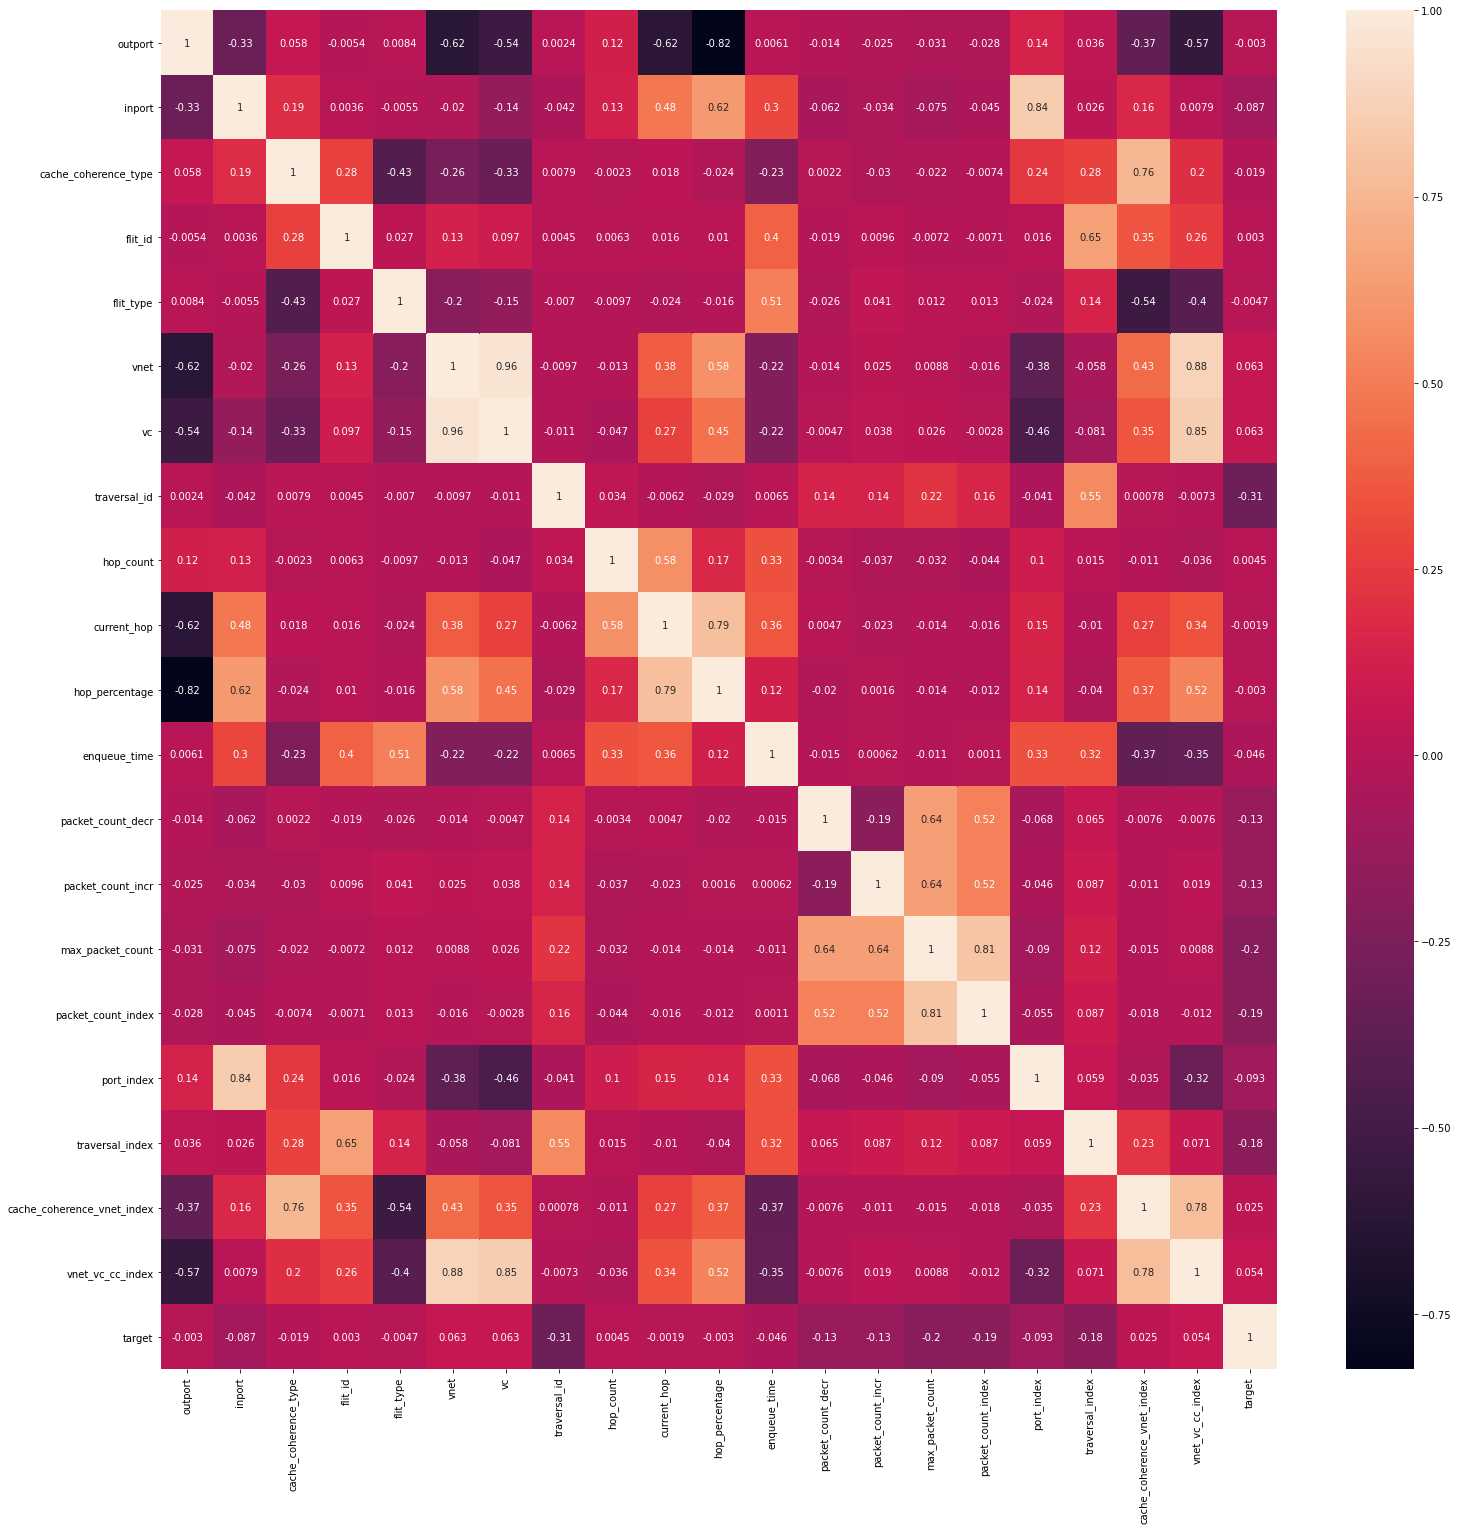

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

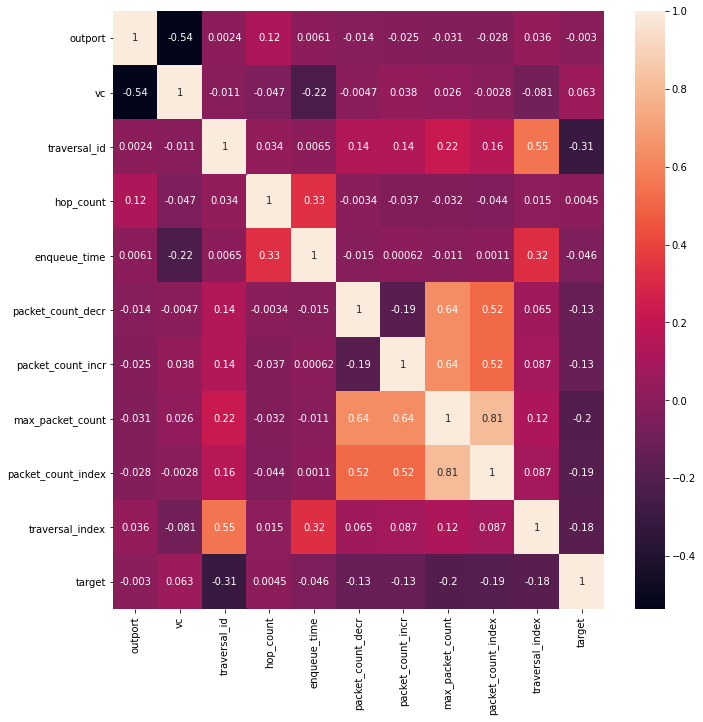

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

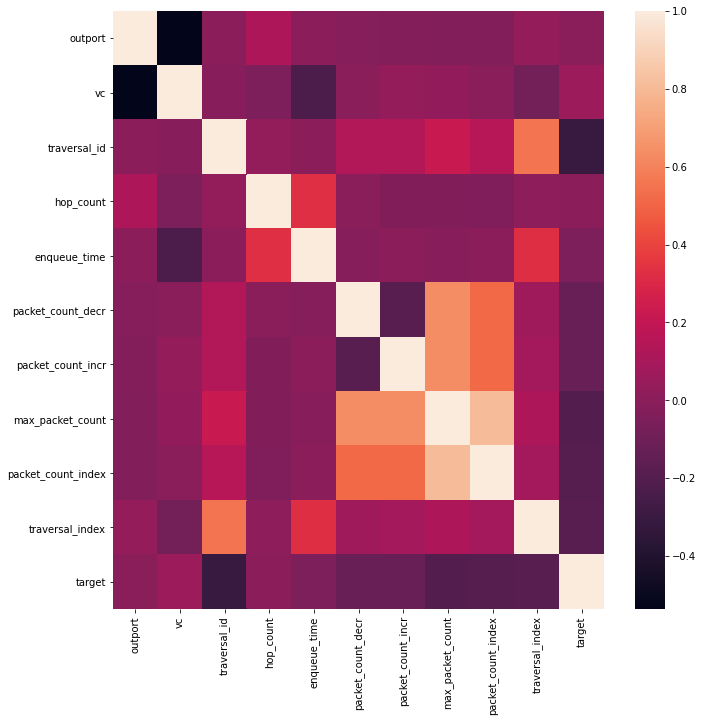

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.0,0.000,0.000000,0.666667,0.000000,0.260504,0.000000,0.260504,0.004306,0.000000
1,1.0,0.000,0.000000,0.666667,0.000000,0.256303,0.000000,0.256303,0.004236,0.000000
2,0.0,1.000,0.000000,0.666667,0.225352,0.256303,0.004202,0.260504,0.008542,0.000000
3,0.0,1.000,0.000000,0.666667,0.239437,0.252101,0.008403,0.260504,0.012640,0.000002
4,0.0,1.000,0.000000,0.666667,0.253521,0.247899,0.012605,0.260504,0.016598,0.000004
...,...,...,...,...,...,...,...,...,...,...
248091,0.5,0.000,0.999983,0.500000,0.211268,0.016807,0.029412,0.046218,0.002709,0.266666
248092,0.5,0.000,0.999983,0.500000,0.309859,0.012605,0.033613,0.046218,0.002431,0.400000
248093,0.5,0.000,0.999983,0.500000,0.408451,0.008403,0.037815,0.046218,0.002014,0.533333
248094,0.5,0.000,0.999983,0.500000,0.507042,0.004202,0.042017,0.046218,0.001458,1.000000


In [20]:
train_X[train_X.duplicated()].shape

(7, 10)

In [21]:
test_X = df3.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df3['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.0,0.000,0.000000,0.666667,0.000000,0.250000,0.000000,0.250000,0.004032,0.000000
1,0.5,0.000,0.000133,0.500000,0.054054,0.245902,0.004098,0.250000,0.007998,0.000006
2,0.0,1.000,0.000000,0.666667,0.216216,0.241803,0.008197,0.250000,0.011832,0.000000
3,0.0,1.000,0.000000,0.666667,0.229730,0.237705,0.012295,0.250000,0.015534,0.000002
4,0.0,1.000,0.000000,0.666667,0.243243,0.233607,0.016393,0.250000,0.019104,0.000004
...,...,...,...,...,...,...,...,...,...,...
140307,0.5,0.000,0.999983,0.500000,0.202703,0.016393,0.028689,0.045082,0.002578,0.266666
140308,0.5,0.000,0.999983,0.500000,0.297297,0.012295,0.032787,0.045082,0.002314,0.400000
140309,0.5,0.000,0.999983,0.500000,0.391892,0.008197,0.036885,0.045082,0.001917,0.533333
140310,0.5,0.000,0.999983,0.500000,0.486486,0.004098,0.040984,0.045082,0.001388,1.000000


In [22]:
test_X1 = df4.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df4['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df5['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [24]:
test_X3 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df6['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [25]:
test_X4 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df7['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [27]:
train_Y = df['target']
train_Y.value_counts()

0    139011
1    109085
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  2520.835542
9     traversal_index   905.105999
8  packet_count_index   804.935445
7    max_packet_count   688.130409
1                  vc   362.738820
5   packet_count_decr   349.602146
6   packet_count_incr   338.571846
4        enqueue_time    36.020993
0             outport     0.819944
3           hop_count     0.569201


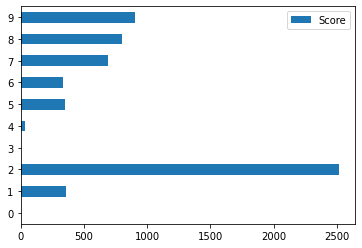

In [30]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [35]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 98.71077582057946
Test Prediction Score 97.95656634746922


In [36]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 79.76652032613035
Test Prediction Score 82.05067351327249
Test Prediction Score 80.28560858305586
Test Prediction Score 79.68917109799786
Test Prediction Score 80.9988234336498


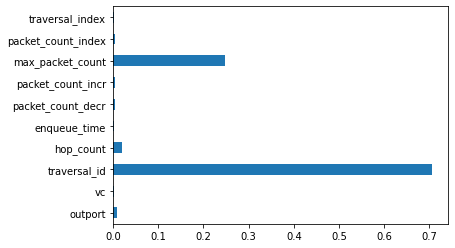

In [37]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

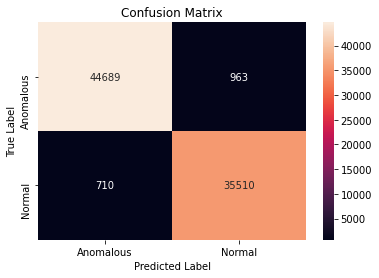

In [38]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [39]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     45652
           1       0.97      0.98      0.98     36220

    accuracy                           0.98     81872
   macro avg       0.98      0.98      0.98     81872
weighted avg       0.98      0.98      0.98     81872



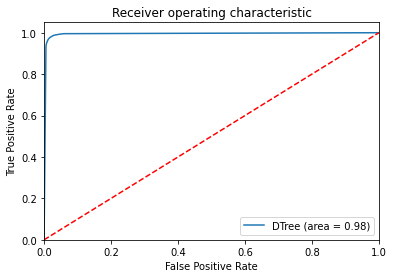

In [40]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [42]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r0l-i3.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [45]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.99819520646838
Test Prediction Score 99.91816494039476


In [46]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 80.92109014196932
Test Prediction Score 83.02228742799197
Test Prediction Score 81.50943396226415
Test Prediction Score 81.08251624821438
Test Prediction Score 81.20601750789928


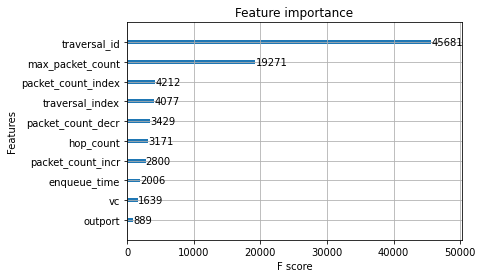

In [47]:
plot_importance(xgbc)
plt.show()

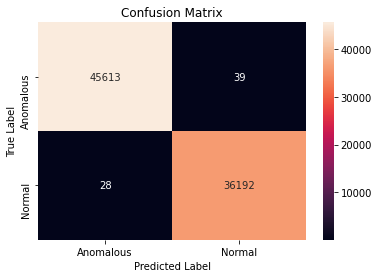

In [48]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [49]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45652
           1       1.00      1.00      1.00     36220

    accuracy                           1.00     81872
   macro avg       1.00      1.00      1.00     81872
weighted avg       1.00      1.00      1.00     81872



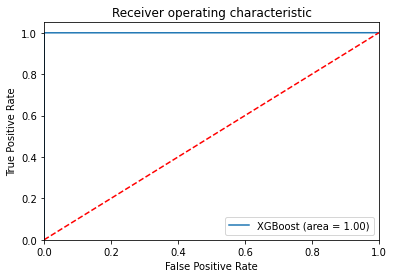

In [50]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()